In [5]:
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1"

In [6]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Generate synthetic clusters
features, true_labels = make_blobs(
    n_samples=200,    # total number of samples
    centers=3,        # number of centers
    cluster_std=2.75, # standard deviation
    random_state=42
)

# returns a tuple of two values:
# a two-dimensional NumPy array with the x- and y-values for each of the samples
# a one-dimensional NumPy array containing the cluster labels for each sample

In [4]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [5]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [6]:
# Machine learning algorithms need to consider all features on an even playing field. 
# The values for all features must be transformed to the same scale.
# Feature scaling: The process of transforming numerical features to use the same scale.
# Important data preprocessing step for most distance-based machine learning algorithms.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [7]:
# Instantiate the KMeans class
kmeans = KMeans(
    init="random",   # "random": standard; "k-means++": employs an advanced trick to speed up convergence
    n_clusters=3,    # sets k for the clustering step
    n_init=10,       # sets the number of initializations to perform
    max_iter=300,    # sets the number of maximum iterations for each initialization
    random_state=42
)

# Fit it to the data in scaled_features
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [8]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [9]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [10]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [11]:
# The cluster assignments are stored as a one-dimensional NumPy array
kmeans.labels_[:5]

array([2, 0, 1, 1, 1])

In [12]:
# Choosing the Appropriate Number of Clusters
# elbow method: run several k-means, increment k with each iteration, and record the SSE

kmeans_kwargs = {
    "init": "random", 
    "n_init": 10, 
    "max_iter": 300, 
    "random_state": 42
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

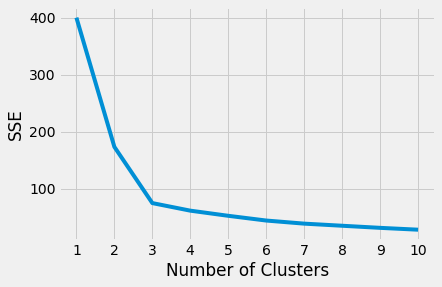

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot SSE vs. number of clusters: SSE continues to decrease as increase k
# elbow point: x-value of this point is thought to be a reasonable trade-off between error and number of clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
plt.clf()

In [15]:
# Determining the elbow point in the SSE curve
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [15]:
# Choosing the Appropriate Number of Clusters
# silhouette coefficient: a measure of cluster cohesion and separation, values range between -1 and 1
# silhouette coefficient = (b-a)/max(a, b)
# a is the mean distance to the other instances in the same cluster
# b is the mean nearest-cluster distance

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

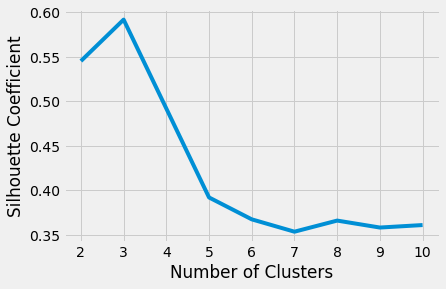

<Figure size 432x288 with 0 Axes>

In [16]:
# Plotting the average silhouette scores for each k 
# The best choice for k with the maximum score
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
plt.clf()

In [3]:
# Common imports
import numpy as np
import os
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Let's start by generating some blobs ---
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(
    n_samples=2000, 
    centers=blob_centers,
    cluster_std=blob_std, 
    random_state=7)

# ------- end of generating blobs ----- 

print(X, ' is X\n')

k = 5
kmeans = KMeans(n_clusters=k)
y_labels = kmeans.fit_predict(X)

print('y_labels: ', y_labels)

[[-2.69823941  1.3454702 ]
 [-2.87459835  1.8097575 ]
 [ 0.96077126  1.17046777]
 ...
 [-2.80303543  2.72948115]
 [ 0.24057359  2.40103109]
 [-2.63807768  1.95621065]]  is X

y_labels:  [0 4 2 ... 3 2 4]


In [20]:
print('kmeans.cluster_centers_ :\n', kmeans.cluster_centers_)

kmeans.cluster_centers_ :
 [[ 0.20876306  2.25551336]
 [-2.80389616  1.80117999]
 [-1.46679593  2.28585348]
 [-2.79290307  2.79641063]
 [-2.80037642  1.30082566]]


In [19]:
# Assign new instances to the cluster whose centroid is closest
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
y_new_pred = kmeans.predict(X_new)
print('y_new_pred: ', y_new_pred)

y_new_pred:  [0 0 3 3]


In [21]:
# Hard clustering assigns each instance to a single cluster.
# Soft clustering assigns a score per cluster to each instance.
# This score may represent the distance between the instance and the respective centroid, 
# or it could be a similarity score. 

# Display the distance measures from each instance to every centroid
print('kmeans.transform(X_new):\n', kmeans.transform(X_new))

kmeans.transform(X_new):
 [[0.32995317 2.81093633 1.49439034 2.9042344  2.88633901]
 [2.80290755 5.80730058 4.4759332  5.84739223 5.84236351]
 [3.29399768 1.21475352 1.69136631 0.29040966 1.71086031]
 [3.21806371 0.72581411 1.54808703 0.36159148 1.21567622]]


In [22]:
# model's inertia: the mean squared distance between each instance and its closest centroid
print('kmeans.inertia_: ', kmeans.inertia_)

# corresponding "score" value is negative considering we look for a higher score to select a suitable model
print('kmeans.score(X): ', kmeans.score(X))

kmeans.inertia_:  211.59853725816828
kmeans.score(X):  -211.59853725816828


In [7]:
scores = []

for k in range(2,9):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

print('silhouette_scores: \n', scores)
score_max = np.max(scores)
k_max = np.argmax(scores) + 2
print('k_max: ', k_max, '\nscore_max: ' , score_max)

silhouette_scores: 
 [0.5966442557582528, 0.5723900247411775, 0.688531617595759, 0.655517642572828, 0.6020248775444942, 0.6068660656395705, 0.5611427500011699]
k_max:  4 
score_max:  0.688531617595759


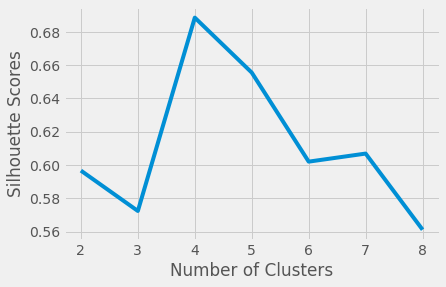

<Figure size 432x288 with 0 Axes>

In [9]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 9), scores)
plt.xticks(range(2, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")
plt.show()
plt.clf()

[1 1 1 1 1 0 0 0 0 0]


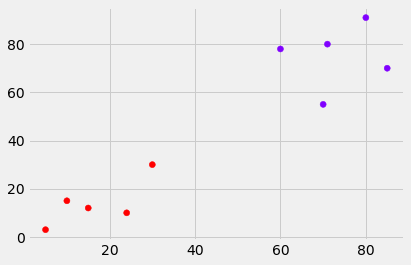

<Figure size 432x288 with 0 Axes>

In [25]:
# Agglomerative clustering is the most common type of hierarchical clustering 
# used to group objects in clusters based on their similarity, aka, AGNES (Agglomerative Nesting)
# The result is a tree-based representation of the objects, named dendrogram.
# Agglomerative clustering is good at identifying small clusters

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import or create the dataset
X = np.array(
    [[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X) 
print(cluster.labels_)

plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()
plt.clf()

# The inverse of agglomerative clustering is divisive clustering, aka, DIANA (Divise Analysis)
# it works in a “top-down” manner.
# Divisive clustering is good at identifying large clusters.

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import numpy as np

X, y = make_moons(n_samples=1000, noise=0.05)
print(X, " is X\n")

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

print('dbscan.labels_[:10]: \n', dbscan.labels_[:10])
print('np.unique(dbscan.labels_): \n', np.unique(dbscan.labels_))

# eps, default=0.5
# The maximum distance between two samples for one to be considered as in the neighborhood of the other. 
# This is not a maximum bound on the distances of points within a cluster.
# This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

# min_samples, default=5
# The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 
# This includes the point itself.
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

[[ 1.86360306  0.02695401]
 [ 0.85619234 -0.51100932]
 [-0.90736429  0.44084423]
 ...
 [ 0.97116963  0.3060533 ]
 [ 0.06957586  0.43508554]
 [ 0.9415501   0.10949775]]  is X

dbscan.labels_[:10]: 
 [ 0  0  1  2 -1  1  2  6  2  2]
np.unique(dbscan.labels_): 
 [-1  0  1  2  3  4  5  6  7  8  9]


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


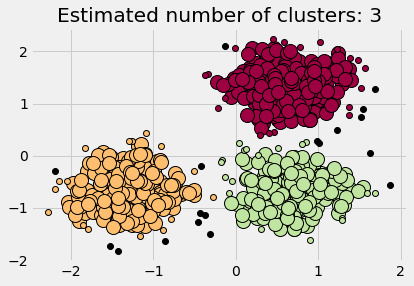

<Figure size 432x288 with 0 Axes>

In [27]:
# Density-based spatial clustering of applications with noise (DBSCAN) is a popular clustering algorithm,
# uses local density estimation to identify clusters of arbitrary shapes not possible with the K-Means algorithm.

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
plt.clf()